In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

import pathlib

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!unzip /gdrive/MyDrive/data/harmful_algae_images/input.zip -d /content

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/train/PE/PE (33).tif  
  inflating: /content/train/PE/PE (330).tif  
  inflating: /content/train/PE/PE (331).tif  
  inflating: /content/train/PE/PE (332).tif  
  inflating: /content/train/PE/PE (333).tif  
  inflating: /content/train/PE/PE (334).tif  
  inflating: /content/train/PE/PE (335).tif  
  inflating: /content/train/PE/PE (336).tif  
  inflating: /content/train/PE/PE (337).tif  
  inflating: /content/train/PE/PE (338).tif  
  inflating: /content/train/PE/PE (339).tif  
  inflating: /content/train/PE/PE (34).tif  
  inflating: /content/train/PE/PE (340).tif  
  inflating: /content/train/PE/PE (341).tif  
  inflating: /content/train/PE/PE (342).tif  
  inflating: /content/train/PE/PE (343).tif  
  inflating: /content/train/PE/PE (344).tif  
  inflating: /content/train/PE/PE (345).tif  
  inflating: /content/train/PE/PE (346).tif  
  inflating: /content/train/PE/PE (347).tif  
  inflating: /content/train/PE/PE (348).tif  


In [ ]:
train_path = '/content/train'
img_size = 150
batch_size = 32

datagen = ImageDataGenerator(rescale=1.0/255)

train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(img_size,img_size),
                                        color_mode = "grayscale",
                                        batch_size=batch_size,
                                        class_mode='categorical')




Found 12500 images belonging to 5 classes.


In [ ]:
val_path = '/content/val'
test_path = '/content/test'

val_gen = datagen.flow_from_directory(val_path,
                                      target_size=(img_size,img_size),
                                      color_mode = "grayscale",
                                      batch_size=batch_size,
                                      class_mode='categorical')

# Note: shuffle=False causes the test dataset to not be shuffled
test_gen = datagen.flow_from_directory(test_path,
                                        target_size=(img_size,img_size),
                                        color_mode = "grayscale",
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)

Found 1750 images belonging to 5 classes.
Found 3750 images belonging to 5 classes.


In [ ]:
kernel_size = (3,3)
pool_size= (2,2)
first_filters = 32
second_filters = 64
third_filters = 128

model = Sequential()
model.add(Conv2D(first_filters, kernel_size, activation = 'relu', input_shape = (img_size, img_size, 1)))
model.add(MaxPooling2D(pool_size = pool_size)) 

model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))

model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(256, activation = "relu"))
model.add(Dense(5, activation = "softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(train_gen, 
                              steps_per_epoch=250, 
                              epochs = 10,
                              validation_data=val_gen,
                              validation_steps=25,
                              verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
250/250 - 19s - loss: 0.3975 - accuracy: 0.8480 - val_loss: 0.1211 - val_accuracy: 0.9588 - 19s/epoch - 74ms/step
Epoch 2/10
250/250 - 16s - loss: 0.1453 - accuracy: 0.9472 - val_loss: 0.1162 - val_accuracy: 0.9600 - 16s/epoch - 66ms/step
Epoch 3/10
250/250 - 16s - loss: 0.1306 - accuracy: 0.9505 - val_loss: 0.1567 - val_accuracy: 0.9375 - 16s/epoch - 66ms/step
Epoch 4/10
250/250 - 17s - loss: 0.1032 - accuracy: 0.9635 - val_loss: 0.0976 - val_accuracy: 0.9675 - 17s/epoch - 68ms/step
Epoch 5/10
250/250 - 18s - loss: 0.0897 - accuracy: 0.9702 - val_loss: 0.1004 - val_accuracy: 0.9613 - 18s/epoch - 73ms/step
Epoch 6/10
250/250 - 17s - loss: 0.0682 - accuracy: 0.9785 - val_loss: 0.0777 - val_accuracy: 0.9762 - 17s/epoch - 69ms/step
Epoch 7/10
250/250 - 17s - loss: 0.0543 - accuracy: 0.9842 - val_loss: 0.0727 - val_accuracy: 0.9775 - 17s/epoch - 69ms/step
Epoch 8/10
250/250 - 17s - loss: 0.0452 - accuracy: 0.9864 - val_loss: 0.0469 - val_accuracy: 0.9887 - 17s/epoch - 66ms/step


In [ ]:
def vis(history,name) :
    plt.title(f"{name.upper()}")
    plt.xlabel('epochs')
    plt.ylabel(f"{name.lower()}")
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}",None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None :
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.05, 1.2) , fontsize=10 , ncol=1)
    
def plot_history(history) :
    key_value = list(set([i.split("val_")[-1] for i in list(history.history.keys())]))
    plt.figure(figsize=(12, 4))
    for idx , key in enumerate(key_value) :
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()

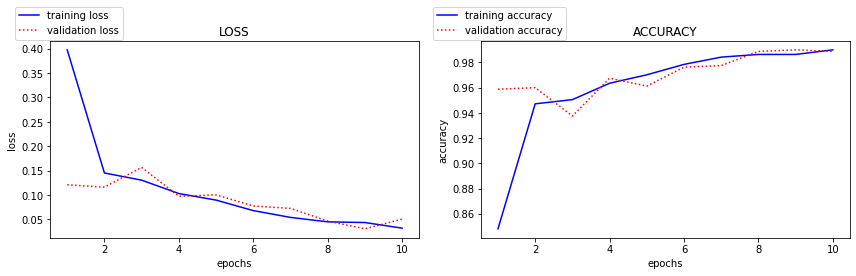

In [ ]:
plot_history(history)

In [ ]:
scores = model.evaluate_generator(test_gen, steps = 750)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
scores

[0.0416092649102211, 0.9933333396911621]

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
label_map = (train_gen.class_indices)
label_map

{'FR': 0, 'MS': 1, 'OS': 2, 'PE': 3, 'SY': 4}

In [ ]:
test1_path = '/content/test1'

# Note: shuffle=False causes the test dataset to not be shuffled
test1_gen = datagen.flow_from_directory(test1_path,
                                        target_size=(img_size,img_size),
                                        color_mode = "grayscale",
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)

Found 50 images belonging to 1 classes.


In [ ]:
test1_gen.filenames

['test/FR (2851).tif',
 'test/FR (2852).tif',
 'test/FR (2853).tif',
 'test/FR (2854).tif',
 'test/FR (2855).tif',
 'test/FR (2856).tif',
 'test/FR (2857).tif',
 'test/FR (2858).tif',
 'test/FR (2859).tif',
 'test/FR (2860).tif',
 'test/MS (2851).tif',
 'test/MS (2852).tif',
 'test/MS (2853).tif',
 'test/MS (2854).tif',
 'test/MS (2855).tif',
 'test/MS (2856).tif',
 'test/MS (2857).tif',
 'test/MS (2858).tif',
 'test/MS (2859).tif',
 'test/MS (2860).tif',
 'test/OS (2851).tif',
 'test/OS (2852).tif',
 'test/OS (2853).tif',
 'test/OS (2854).tif',
 'test/OS (2855).tif',
 'test/OS (2856).tif',
 'test/OS (2857).tif',
 'test/OS (2858).tif',
 'test/OS (2859).tif',
 'test/OS (2860).tif',
 'test/PE (2851).tif',
 'test/PE (2852).tif',
 'test/PE (2853).tif',
 'test/PE (2854).tif',
 'test/PE (2855).tif',
 'test/PE (2856).tif',
 'test/PE (2857).tif',
 'test/PE (2858).tif',
 'test/PE (2859).tif',
 'test/PE (2860).tif',
 'test/SY (2851).tif',
 'test/SY (2852).tif',
 'test/SY (2853).tif',
 'test/SY (

In [ ]:
len(test1_gen.filenames)

50

In [ ]:
pred = model.predict_generator(test1_gen, steps = 50, verbose = 1)


31/50 [=================>............] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


50/50 [==============================] - 0s 4ms/step


In [ ]:
label_map = (train_gen.class_indices)
label_map

{'FR': 0, 'MS': 1, 'OS': 2, 'PE': 3, 'SY': 4}

In [ ]:
import pandas as pd

df = pd.concat([pd.DataFrame(pred), pd.DataFrame(test1_gen.filenames)], axis=1)
df

,0,1,2,3,4,0
0,9.968206e-01,2.549144e-07,3.137157e-03,4.145340e-05,6.336944e-07,test/FR (2851).tif
1,9.931838e-01,2.189466e-07,6.695505e-03,1.188814e-04,1.484640e-06,test/FR (2852).tif
2,9.437885e-01,6.988831e-08,5.614884e-02,5.623511e-05,6.303998e-06,test/FR (2853).tif
3,9.801651e-01,4.613903e-08,1.978647e-02,4.594458e-05,2.465862e-06,test/FR (2854).tif
4,9.999869e-01,2.375078e-08,3.729602e-06,9.404928e-06,4.335944e-09,test/FR (2855).tif
5,9.999593e-01,5.737402e-08,5.894201e-06,3.473665e-05,4.895211e-09,test/FR (2856).tif
6,9.917001e-01,1.806231e-06,7.935243e-03,3.520215e-04,1.087644e-05,test/FR (2857).tif
7,9.941643e-01,1.613940e-06,5.606744e-03,2.212944e-04,6.022471e-06,test/FR (2858).tif
8,9.587077e-01,1.106705e-07,4.075654e-02,5.299642e-04,5.719474e-06,test/FR (2859).tif
9,9.875578e-01,1.088610e-07,1.198265e-02,4.572866e-04,2.209282e-06,test/FR (2860).tif
